# Simple FNN & MLP

`Author: YUAN Yanzhe`

- realized a simple baseline of MLP in MNIST calssification task using PyTorch
  - the network structure is: input-linear-relu-linear-softmax
  
- for reference in the future work

## MLP in MNIST


In [7]:
# import packages
import torch
from torch import nn as nn
from torch import optim as optim
from torch.nn import init 
import torchvision
from torch.utils import data as Data
from torchvision import transforms

import numpy 
import matplotlib 
from matplotlib import pyplot as plt

import d2lzh_pytorch as d2dl


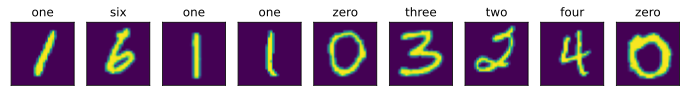

mlp(
  (linear_1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (linear_2): Linear(in_features=256, out_features=10, bias=True)
)
Epoch: 1, avg_loss: 2.2654, avg_acc: 0.393517
Epoch: 1, test_acc:0.5294
Epoch: 2, avg_loss: 2.0455, avg_acc: 0.593533
Epoch: 2, test_acc:0.6675
Epoch: 3, avg_loss: 1.5086, avg_acc: 0.701250
Epoch: 3, test_acc:0.7477
Epoch: 4, avg_loss: 1.0361, avg_acc: 0.772683
Epoch: 4, test_acc:0.8082
Epoch: 5, avg_loss: 0.7910, avg_acc: 0.815017
Epoch: 5, test_acc:0.8317


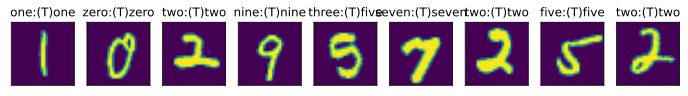

In [15]:
# Hyperparameters
num_input = 784
num_hidden = 256
num_output = 10

batch_size = 256
num_epochs = 5
learning_rate = 0.01

# Obtain Data
train_data = torchvision.datasets.MNIST(root='/Users/yanzheyuan/coding/dataset_pytorch/',\
                                       train=True, transform=transforms.ToTensor()) 

test_data = torchvision.datasets.MNIST(root='/Users/yanzheyuan/coding/dataset_pytorch/',\
                                       train=False, transform=transforms.ToTensor())

# Load Data
train_iterator = Data.DataLoader(train_data,batch_size,shuffle=True)
test_iterator = Data.DataLoader(test_data,batch_size,shuffle=True)

# Visualize Data
def labels_to_text(labels):
    dictionary = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
    return [dictionary[int(i)] for i in labels]

def draw_multiple_images(images, labels):
    d2dl.use_svg_display()
    _, axes = plt.subplots(1, len(labels), figsize=(12,12))
    for axe,image,label in zip(axes, images, labels):
        axe.imshow(image.view(image.size(1),image.size(1),-1))
        axe.set_title(label)
        axe.axes.get_xaxis().set_visible(False)
        axe.axes.get_yaxis().set_visible(False)
    plt.show()

# draw
exmp, lbl = iter(train_iterator).next()
draw_multiple_images(exmp[0:9],labels_to_text(lbl[0:9]))

# Define Model
class mlp(nn.Module):
    def __init__(self,num_input,num_hidden,num_output):
        super(mlp,self).__init__()
        self.linear_1 = nn.Linear(num_input,num_hidden)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(num_hidden,num_output)
    
    def forward(self, x):
        y = self.linear_2(self.relu(self.linear_1(x)))
        return y

net = mlp(num_input,num_hidden,num_output)
print(net)

loss_func = nn.CrossEntropyLoss()
optimizor = optim.SGD(net.parameters(),lr=learning_rate)

# Train Model
for param in net.parameters():
    init.normal_(param,mean=0,std=0.01)

for epoch in range(num_epochs):
    correct,total_loss,total_batch,total_exmp,accuracy = 0,0.0,0,0,0.0
    for X,y in train_iterator:
        output = net(X.view(-1,num_input))   # don't forget to flatten the input if no FlattenLayer!
        loss = loss_func(output,y)  # this is a mean of loss
        optimizor.zero_grad()
        loss.backward()
        optimizor.step()
    
        # measure loss
        total_batch += 1
        total_exmp += y.size(0)
        total_loss += loss.item()
        correct += (torch.argmax(output,1)==y).sum().item()
    print('Epoch: %d, avg_loss: %.4f, avg_acc: %f' %(epoch+1,total_loss/total_batch,correct/total_exmp))
    
    # test
    with torch.no_grad():
        correct,total_exmp,accuracy = 0,0,0.0
        for X,y in test_iterator:
            output = net(X.view(-1,num_input))
            loss = loss_func(output,y)
            
            # only calculate acc in testing
            total_exmp += y.size(0)
            correct += (torch.argmax(output,1)==y).sum().item()
        print('Epoch: %d, test_acc:%.4f' %(epoch+1,correct/total_exmp))


# Predict 
X_test, y_test = iter(test_iterator).next()
test_prediction = net(X_test.view(-1,num_input))
test_label = labels_to_text(y_test[0:9])
test_label_pridiction = labels_to_text(test_prediction.argmax(1)[0:9])
# visualize
text = [a+':(T)'+b for (a,b) in zip(test_label_pridiction,test_label)]
draw_multiple_images(X_test,text)